# Análisis de Anuncios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_anuncios = pd.read_csv('Advertising.csv')

In [ ]:
df_anuncios

,Date,TV,newspaper,radio,sales
0,2018-01-01,230100000.0,69200000.0,37800000.0,22100000.0
1,2018-01-02,44500000.0,45100000.0,39300000.0,10400000.0
2,2018-01-03,17200000.0,69300000.0,45900000.0,9300000.0
3,2018-01-04,151500000.0,58500000.0,41300000.0,18500000.0
4,2018-01-05,180800000.0,58400000.0,10800000.0,12900000.0
...,...,...,...,...,...
195,2018-07-15,38200000.0,13800000.0,3700000.0,7600000.0
196,2018-07-16,94200000.0,8100000.0,4900000.0,9700000.0
197,2018-07-17,177000000.0,6400000.0,9300000.0,12800000.0
198,2018-07-18,283600000.0,66200000.0,42000000.0,25500000.0


In [ ]:
df_anuncios.describe()

,TV,newspaper,radio,sales
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.470425e+08,3.055400e+07,2.326400e+07,1.402250e+07
std,8.585424e+07,2.177862e+07,1.484681e+07,5.217457e+06
min,7.000000e+05,3.000000e+05,0.000000e+00,1.600000e+06
25%,7.437500e+07,1.275000e+07,9.975000e+06,1.037500e+07
50%,1.497500e+08,2.575000e+07,2.290000e+07,1.290000e+07
75%,2.188250e+08,4.510000e+07,3.652500e+07,1.740000e+07
max,2.964000e+08,1.140000e+08,4.960000e+07,2.700000e+07


In [ ]:
df_anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       200 non-null    object 
 1   TV         200 non-null    float64
 2   newspaper  200 non-null    float64
 3   radio      200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:ylabel='Inversion'>

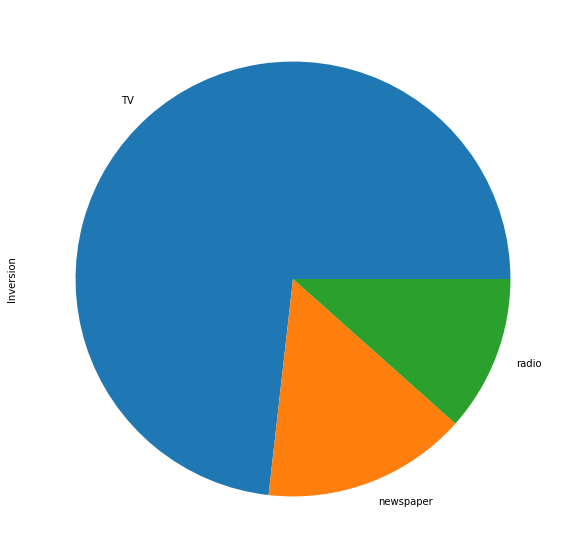

In [ ]:
df_anuncios_melt = df_anuncios.melt(id_vars = 'Date',
                                    value_vars = ['TV','newspaper','radio'],
                                    var_name = 'Medio',
                                    value_name = 'Inversion').groupby('Medio')['Inversion'].sum()
df_anuncios_melt.plot.pie(y = 'Inversion', figsize = (10,10))

In [ ]:
df_anuncios.quantile([0.25,0.5,0.7])

,TV,newspaper,radio,sales
0.25,74375000.0,12750000.0,9975000.0,10375000.0
0.50,149750000.0,25750000.0,22900000.0,12900000.0
0.70,210730000.0,39110000.0,33500000.0,16600000.0


<AxesSubplot:>

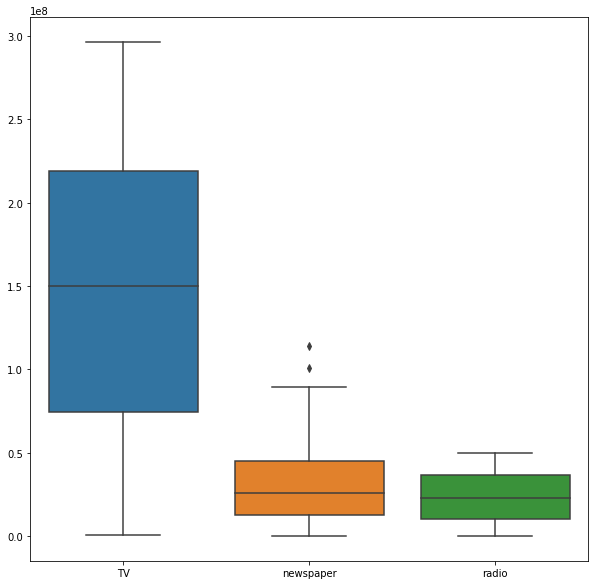

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_anuncios[['TV','newspaper','radio']])

In [ ]:
df_anuncios.Date = pd.to_datetime(df_anuncios.Date)

<AxesSubplot:xlabel='Date', ylabel='Inversion'>

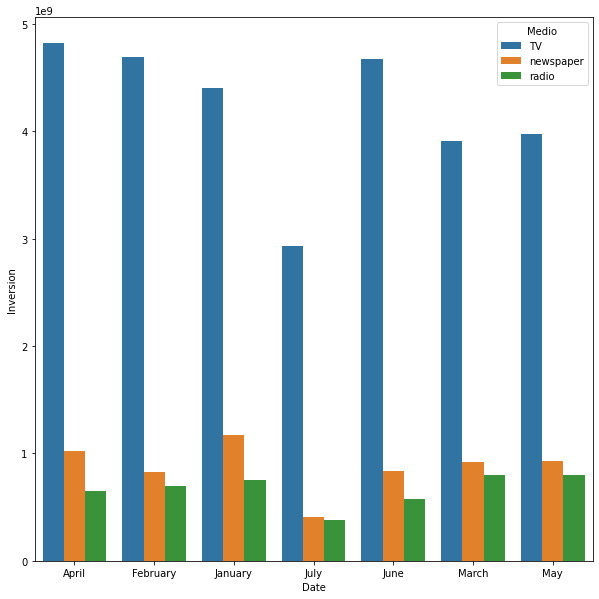

In [ ]:
df_anuncios_mes = df_anuncios.melt(id_vars = 'Date',
                                    value_vars = ['TV','newspaper','radio'],
                                    var_name = 'Medio',
                                    value_name = 'Inversion')
df_anuncios_mes = df_anuncios_mes.groupby([df_anuncios_mes['Date'].dt.strftime('%B'),'Medio'])[['Inversion']].sum().reset_index()

plt.figure(figsize=(10,10))

sns.barplot(x = 'Date',
            y = 'Inversion',
            hue = 'Medio',
            data = df_anuncios_mes,
            ci = None)

<AxesSubplot:>

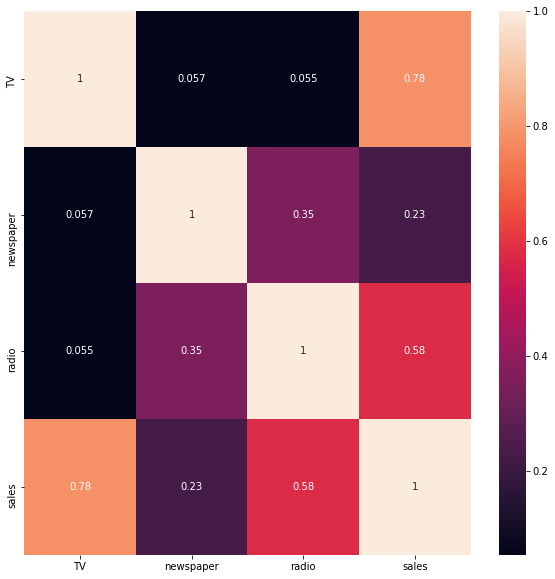

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_anuncios.corr(),
            annot = True)

<Figure size 1080x1080 with 0 Axes>

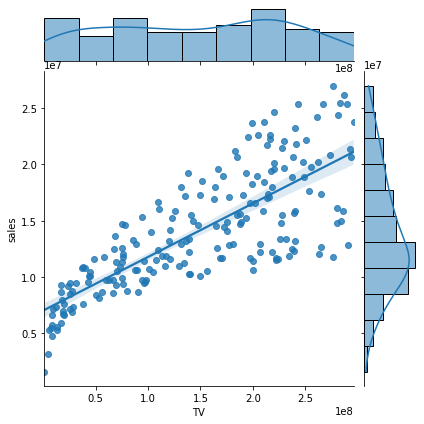

In [ ]:
plt.figure(figsize=(15,15))
sns.jointplot(data = df_anuncios,
            x = 'TV',
            y = 'sales',
            kind = 'reg')

<Figure size 1080x1080 with 0 Axes>

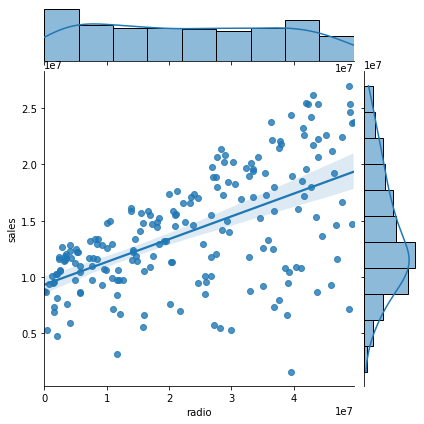

In [ ]:
plt.figure(figsize=(15,15))
sns.jointplot(data = df_anuncios,
            x = 'radio',
            y = 'sales',
            kind = 'reg')

<Figure size 1080x1080 with 0 Axes>

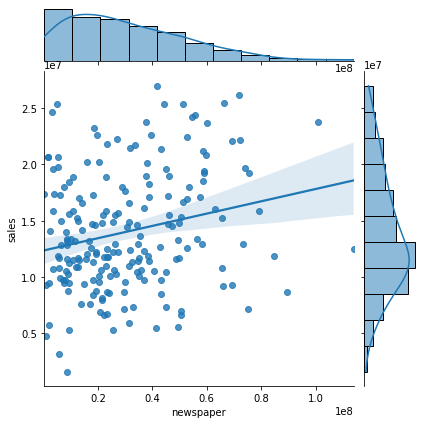

In [ ]:
plt.figure(figsize=(15,15))
sns.jointplot(data = df_anuncios,
            x = 'newspaper',
            y = 'sales',
            kind = 'reg')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11bf7be5-3b62-4605-8e79-42e562c1fd79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>